In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from pyzbar.pyzbar import decode

print("packages successfully imported.")

packages successfully imported.


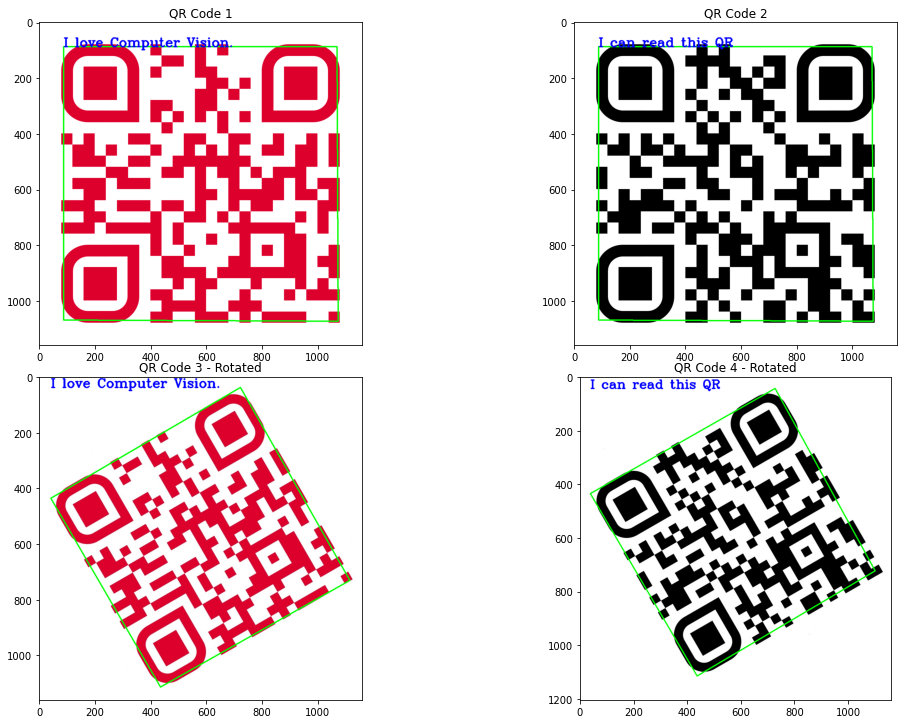

In [2]:
img1 = cv.imread("C:/opencv/opencv/medias/qr1.png")
img2 = cv.imread("C:/opencv/opencv/medias/qr2.png")
img3 = cv.imread("C:/opencv/opencv/medias/qr1_rot.jpg")
img4 = cv.imread("C:/opencv/opencv/medias/qr2_rot.jpg")

for img in [img1, img2, img3, img4]:
    QR_code = decode(img)
    for barcode in decode(img):
        my_data = barcode.data.decode("utf-8")
        points_polygon = np.array([barcode.polygon], np.int32)
        points_polygon = points_polygon.reshape((-1,1,2))
        cv.polylines(img, [points_polygon], True, (0,255,0), 3)
        points_rect = barcode.rect
        cv.putText(img, my_data, (points_rect[0], points_rect[1]), cv.FONT_HERSHEY_COMPLEX, 1.5, (255,0,0), 3)
        
row, col = 2, 2
figure, axis = plt.subplots(row, col, figsize=(15, 10))
figure.tight_layout()

axis[0][0].imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
axis[0][0].set_title('QR Code 1')

axis[0][1].imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
axis[0][1].set_title('QR Code 2')

axis[1][0].imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
axis[1][0].set_title('QR Code 3 - Rotated')

axis[1][1].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
axis[1][1].set_title('QR Code 4 - Rotated')

plt.show()

## Capture video from camera and save it 

In [3]:
cap = cv.VideoCapture(0)
cap.set(3, 640)
cap.set(4, 480)
fourcc =cv.VideoWriter_fourcc(*'mp4v')
out = cv.VideoWriter('C:/opencv/opencv/qr_read.mp4', fourcc, 20.0, (640,480))

while True:
    success, img = cap.read()
    for barcode in decode(img):
        my_data = barcode.data.decode("utf-8")
        #print(my_data)
        points_polygon = np.array([barcode.polygon], np.int32)
        points_polygon = points_polygon.reshape((-1,1,2))
        #print(points_polygon)
        cv.polylines(img, [points_polygon], True, (0,255,0), 3)
        points_rect = barcode.rect
        #print(points_rect)
        cv.putText(img, my_data, (points_rect[0], points_rect[1]), cv.FONT_HERSHEY_COMPLEX, 
        1, (0,0,0), 1)

    out.write(img)

    cv.imshow("QR Code", img)
    if cv.waitKey(5) & 0xFF == ord("q"):
        break


out.release()
cap.release()
cv.destroyAllWindows()